O input do mundo para uma rede é um percept. Uma forma da rede calcular uma saida, pode ser obtida pelo uso do algoritmo Perceptron 
onde a conclusão pode ser 0 ou 1 ou verdadeiro ou falso. O perceptron é representado por 1 neuronio dentro da rede. A partir de um dado 
recebido, um percept, podemos ter a rede calculando uma saida desejada. 

Um peso weights determina a importancia daquele input:

<img src="perceptron.png" alt="image" width="300" height="auto">

Dada as entradas X0, X1 e X2 vemos que X2 é mais importante, pois possui um peso maior. 

Em seguida precisamos somar os resultados da multiplicação dos pesos e avaliar se essa soma corresponde a um limite (bias) determinado para validar essas entradas.

<img src="soma.png" alt="image" width="300" height="auto">

Abaixo segue uma implementação em python para o algoritmo Perceptron


In [1]:
#entradas de uma lista de valores
x_input = [0.1, 0.5, 0.2]

#determinacao de uma lista de pesos
w_weights = [0.4, 0.3, 0.6]

#limite
threshold = 0.5

#definição da funcao de ativação que relaciona os inputs com os pesos e soma-os
def step(weighted_sum):
    #se for maior que nosso limite retorna verdadeiro, se não falso
    if weighted_sum > threshold:
        return 1
    else:
        return 0

#funcao main do perceptron para multiplicar as entradas pelos pesos e armazenar em weighted_sum
def perceptron():
    weighted_sum = 0
    for x,w in zip(x_input, w_weights):
        weighted_sum += x*w
        print(weighted_sum)
    return step(weighted_sum)
    
output = perceptron()
print("Output:" + str(output) )

0.04000000000000001
0.19
0.31
Output:0


O perceptron implementado testou se chegamos ao valor desejado na saida, dado a função de ativação e o limite. Para o caso, retornou 0, pois a soma da multiplicação dos pesos pelas entradas foi menor que esse limite determinado, o threshold 0.5. No entanto se desejarmos o valor 1 , ou seja o target Y, devemos distingui-lo da saida real da rede ^y, a predição, pois ele está anexado ao conjunto de entradas e não pode ser modificado - uma galinha sempre será uma galinha, não há motivos para dizer que ela se parece com uma cabra. Já a predição, ou saida real, pode e deve ser modificada até que seja uma correspondencai perfeita com nosso alvo

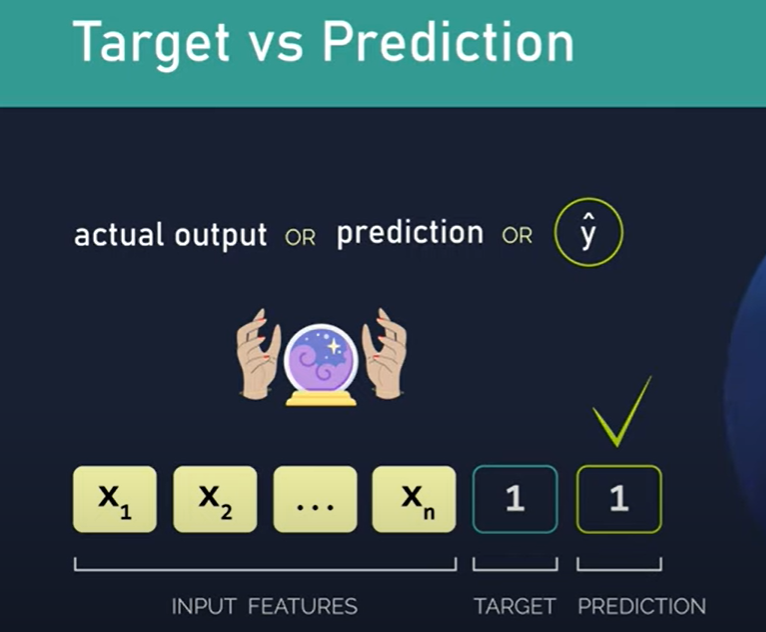

Caso a rede predite 0 enquanto desejamos 1, prcisamos adicionar algo conhecido como Error Function, Loss Function ou ainda chamada de Cost, a qual é usada para calcular a distancia entre um ponto dado e seu alvo. Ou seja, ela nos da qual a distancia que estamos até a que desejamos chegar.

Uma das funções utilizada é a Cross Entrophy Loss, também chamada de Log Loss:

Dado o target = 0, a entrda 2 possui a soma dos pesos menor que o treshold, mas a predicao 0 bate com o target = 0

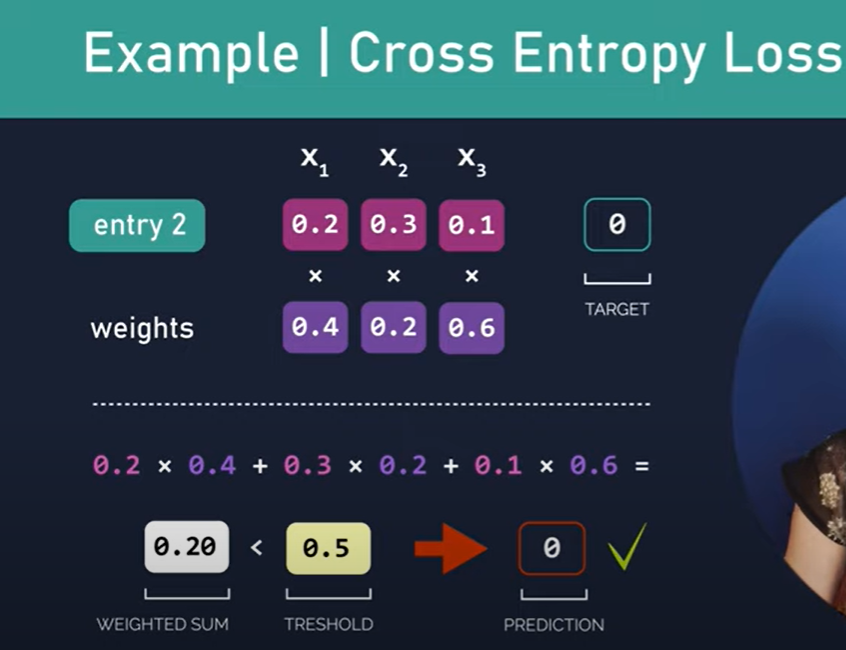

Formula da Cross Entropy Loss:

Onde o Y representa a alvo desejada e w_sum a soma dos pesos X entradas

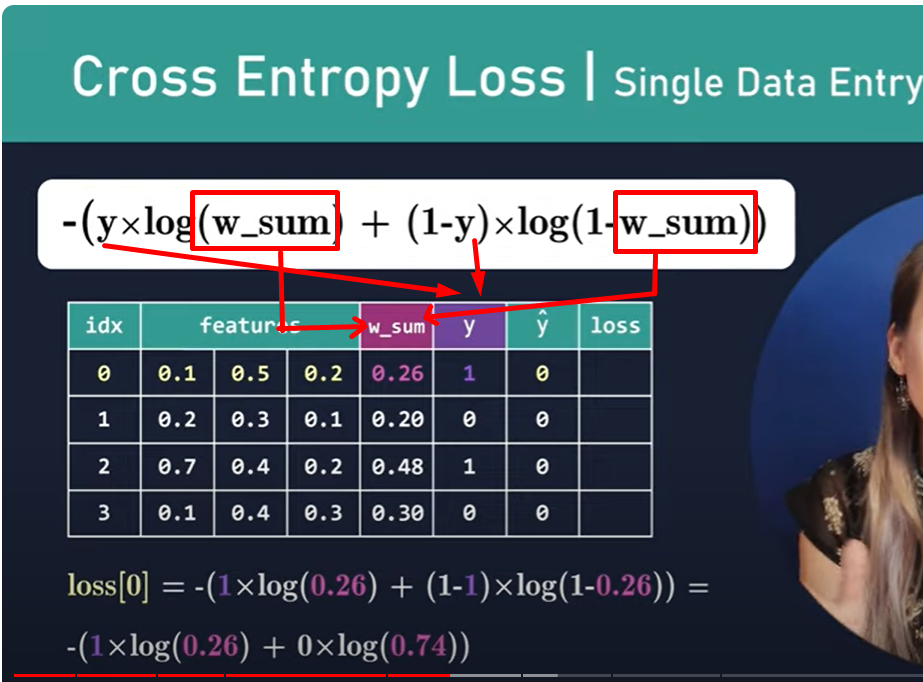

As classificações incorretas são penalizadas. Quanto o target é 1 a parte inicial da equaçao é executada. Quando o target é 0 apenas a segunda 
parte é executada. 

Após calcular cada loss individual é necessario calcular a Total Loss fazendo uma média de todos os valores individuais e dividindo pela quantidade total de entradas. 


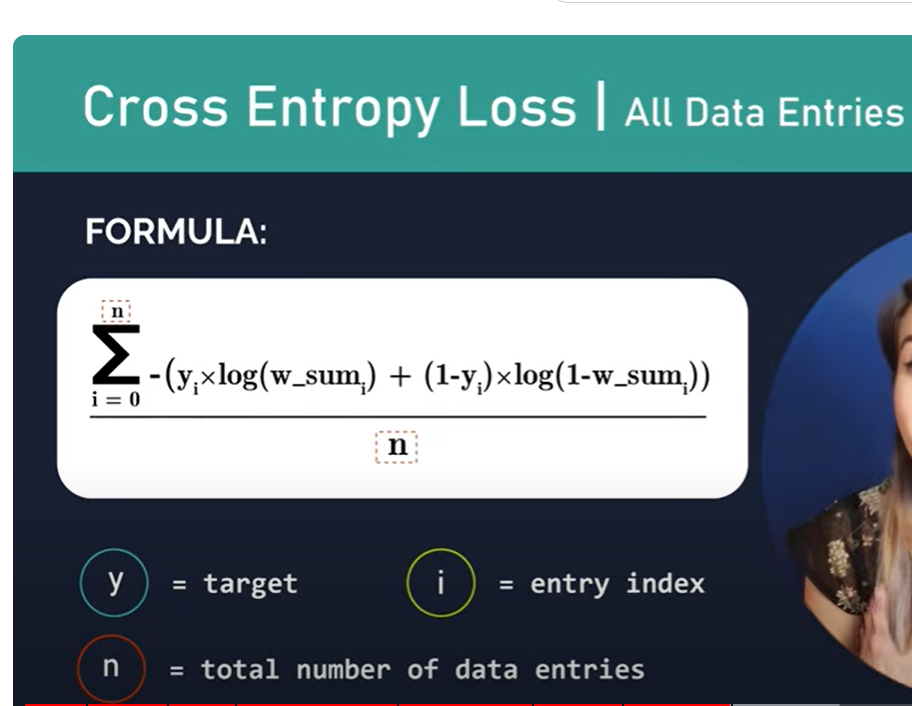



In [2]:
#implementando a Cross Entropy Loss

import math

#declaracao das somas peso X entrada e target
input_data = [(0.26, 1),
              (0.20, 0),
              (0.48, 1),
              (0.30, 0)]

#funcao para calcular a loss
def cross_entropy(input_data):
    loss = 0
    n = len(input_data)
    for entry in input_data:
        #primeira posicao da tupla, ou seja a soma
        w_sum = entry[0]
        #segunda posicao da tupla, o target
        y = entry[1]
        #implementacao da formula com a soma de cada iteracao armazenada em loss
        loss += -(y*math.log10(w_sum) + (1-y)*math.log10(1-w_sum))
        print(-(y*math.log10(w_sum) + (1-y)*math.log10(1-w_sum)))
    return loss/n

error_term = cross_entropy(input_data)
print(error_term)   
        

0.585026652029182
0.09691001300805639
0.3187587626244128
0.1549019599857432
0.2888993469118486


Descida de Gradiente:

usa-se a decida de gradiente para atualizar os pesos de um modelos e para minimizar a Loss